In [2]:
import pandas as pd
import numpy as np

RAW_PATH = "../data/raw/accepted_2007_to_2018Q4.csv"


In [3]:
df_sample = pd.read_csv(RAW_PATH, low_memory=False, nrows=5000)
df_sample.shape


(5000, 151)

In [4]:
df_sample.info()
df_sample.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 5.8+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(df_sample.columns[:25])


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti']

In [6]:
df_sample['loan_status'].value_counts(dropna=False)


loan_status
Fully Paid            3637
Charged Off            816
Current                514
Late (31-120 days)      29
In Grace Period          3
Late (16-30 days)        1
Name: count, dtype: int64

In [7]:
missing = df_sample.isna().mean().sort_values(ascending=False)
missing.head(30)


member_id                                     1.0000
sec_app_num_rev_accts                         1.0000
sec_app_open_act_il                           1.0000
sec_app_inq_last_6mths                        1.0000
sec_app_open_acc                              1.0000
sec_app_mort_acc                              1.0000
sec_app_mths_since_last_major_derog           1.0000
sec_app_collections_12_mths_ex_med            1.0000
sec_app_chargeoff_within_12_mths              1.0000
sec_app_fico_range_low                        1.0000
sec_app_earliest_cr_line                      1.0000
sec_app_revol_util                            1.0000
sec_app_fico_range_high                       1.0000
revol_bal_joint                               1.0000
desc                                          0.9998
verification_status_joint                     0.9942
dti_joint                                     0.9942
annual_inc_joint                              0.9942
orig_projected_additional_accrued_interest    

In [8]:
leak_keywords = [
    "pymnt",
    "total_rec",
    "recoveries",
    "collection",
    "last_pymnt",
    "next_pymnt",
    "last_credit_pull",
    "settlement",
    "hardship",
    "chargeoff",
    "delinq_amnt",
]

leak_cols = [c for c in df_sample.columns
             if any(kw in c.lower() for kw in leak_keywords)]

len(leak_cols), leak_cols


(36,
 ['pymnt_plan',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'recoveries',
  'collection_recovery_fee',
  'last_pymnt_d',
  'last_pymnt_amnt',
  'next_pymnt_d',
  'last_credit_pull_d',
  'collections_12_mths_ex_med',
  'chargeoff_within_12_mths',
  'delinq_amnt',
  'sec_app_chargeoff_within_12_mths',
  'sec_app_collections_12_mths_ex_med',
  'hardship_flag',
  'hardship_type',
  'hardship_reason',
  'hardship_status',
  'hardship_amount',
  'hardship_start_date',
  'hardship_end_date',
  'hardship_length',
  'hardship_dpd',
  'hardship_loan_status',
  'hardship_payoff_balance_amount',
  'hardship_last_payment_amount',
  'debt_settlement_flag',
  'debt_settlement_flag_date',
  'settlement_status',
  'settlement_date',
  'settlement_amount',
  'settlement_percentage',
  'settlement_term'])

In [9]:
num_cols = ["loan_amnt", "funded_amnt", "int_rate", "annual_inc", "dti"]

df_sample[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amnt,5000.0,15234.350000,8647.197140,1000.00,8400.0000,14150.000,20000.0000,35000.00
funded_amnt,5000.0,15234.350000,8647.197140,1000.00,8400.0000,14150.000,20000.0000,35000.00
int_rate,5000.0,12.308078,4.386660,5.32,9.1700,11.990,14.8500,28.99
annual_inc,5000.0,78980.705004,46886.647696,9000.00,50000.0000,70000.000,98000.0000,675000.00
dti,5000.0,19.291466,8.703863,0.00,12.7975,18.725,25.4725,83.64


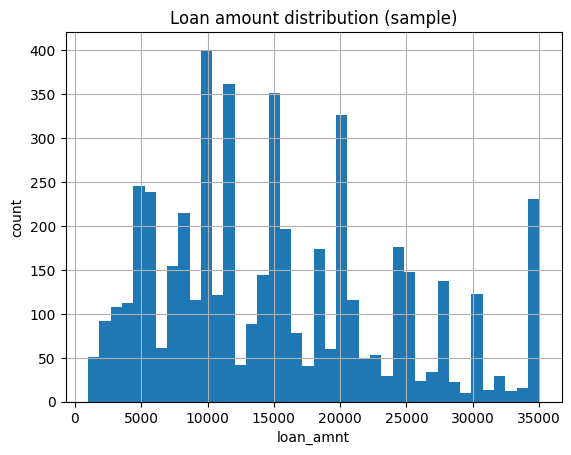

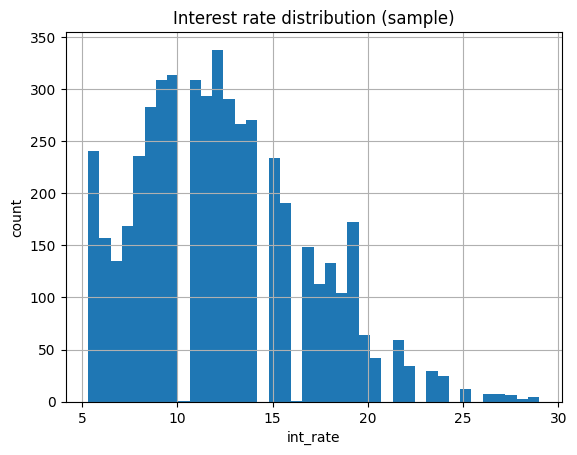

In [10]:
import matplotlib.pyplot as plt

df_sample["loan_amnt"].hist(bins=40)
plt.title("Loan amount distribution (sample)")
plt.xlabel("loan_amnt")
plt.ylabel("count")
plt.show()

df_sample["int_rate"].hist(bins=40)
plt.title("Interest rate distribution (sample)")
plt.xlabel("int_rate")
plt.ylabel("count")
plt.show()


In [11]:
df_sample["grade"].value_counts()
df_sample["sub_grade"].value_counts().head(15)

df_sample["purpose"].value_counts().head(10)

df_sample["home_ownership"].value_counts()

df_sample["verification_status"].value_counts()

df_sample["term"].value_counts()


term
36 months    3525
60 months    1475
Name: count, dtype: int64

In [12]:
df_target = df_sample.copy()

good_statuses = [
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
]

bad_statuses = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (31-120 days)",
    "Late (16-30 days)",
]

mask_keep = df_target["loan_status"].isin(good_statuses + bad_statuses)
df_target = df_target[mask_keep].copy()

status_counts = df_target["loan_status"].value_counts()
status_counts


loan_status
Fully Paid            3637
Charged Off            816
Late (31-120 days)      29
Late (16-30 days)        1
Name: count, dtype: int64

In [13]:
status_to_default = {s: 0 for s in good_statuses}
status_to_default.update({s: 1 for s in bad_statuses})

df_target["default"] = df_target["loan_status"].map(status_to_default)

df_target["default"].value_counts()


default
0    3637
1     846
Name: count, dtype: int64

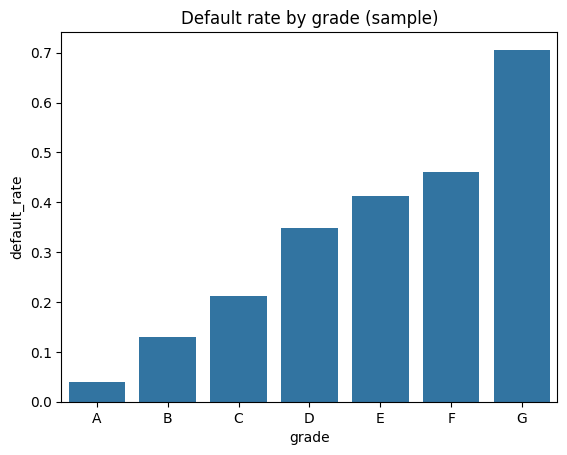

,grade,default
0,A,0.040349
1,B,0.129455
2,C,0.212592
3,D,0.348562
4,E,0.412639
5,F,0.461538
6,G,0.705882


In [14]:
import seaborn as sns

grade_default = (
    df_target.groupby("grade")["default"]
    .mean()
    .sort_index()
    .reset_index()
)

sns.barplot(data=grade_default, x="grade", y="default")
plt.title("Default rate by grade (sample)")
plt.ylabel("default_rate")
plt.show()

grade_default


In [15]:
from pathlib import Path

GOOD_STATUSES = [
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
]

BAD_STATUSES = [
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off",
    "Late (31-120 days)",
    "Late (16-30 days)",
]

status_to_default = {s: 0 for s in GOOD_STATUSES}
status_to_default.update({s: 1 for s in BAD_STATUSES})

candidate_features = [
    "loan_amnt",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "emp_length",
    "home_ownership",
    "annual_inc",
    "verification_status",
    "purpose",
    "dti",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "mort_acc",
    "pub_rec_bankruptcies",
    "fico_range_low",
    "fico_range_high",
    "application_type",
    "initial_list_status",
    "addr_state",
    "issue_d",
    "earliest_cr_line",
]

available_features = [c for c in candidate_features if c in df_sample.columns]
available_features


['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'fico_range_low',
 'fico_range_high',
 'application_type',
 'initial_list_status',
 'addr_state',
 'issue_d',
 'earliest_cr_line']

In [16]:
usecols = available_features + ["loan_status"]
len(usecols), usecols[:10]


(29,
 ['loan_amnt',
  'term',
  'int_rate',
  'installment',
  'grade',
  'sub_grade',
  'emp_length',
  'home_ownership',
  'annual_inc',
  'verification_status'])

In [17]:
df_full = pd.read_csv(
    RAW_PATH,
    low_memory=False,
    usecols=usecols,
)
df_full.shape


(2260701, 29)

In [18]:
mask_keep = df_full["loan_status"].isin(GOOD_STATUSES + BAD_STATUSES)
df_full = df_full[mask_keep].copy()

df_full["default"] = df_full["loan_status"].map(status_to_default).astype(int)

df_full["default"].value_counts(), df_full["default"].mean()


(default
 0    1078739
 1     295176
 Name: count, dtype: int64,
 np.float64(0.21484298519195147))

In [19]:
def clean_term(s):
    if pd.isna(s):
        return np.nan
    return float(str(s).split()[0])

def clean_emp_length(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s.lower() == "n/a":
        return np.nan
    if s == "< 1 year":
        return 0.0
    if s == "10+ years":
        return 10.0
    return float(s.split()[0])

def parse_month_year(s):
    return pd.to_datetime(s, format="%b-%Y", errors="coerce")


In [20]:
df_full["term_months"] = df_full["term"].map(clean_term)
df_full["emp_length_years"] = df_full["emp_length"].map(clean_emp_length)

df_full["issue_date"] = parse_month_year(df_full["issue_d"])
df_full["earliest_cr_date"] = parse_month_year(df_full["earliest_cr_line"])

df_full["credit_age_years"] = (
    (df_full["issue_date"] - df_full["earliest_cr_date"]).dt.days / 365.25
)

df_full["issue_year"] = df_full["issue_date"].dt.year
df_full["issue_month"] = df_full["issue_date"].dt.month

df_full = df_full.drop(
    columns=["term", "emp_length", "issue_d", "earliest_cr_line", "issue_date", "earliest_cr_date"]
)

df_full.shape


(1373915, 31)

In [21]:
target_col = "default"

categorical_cols = [
    "grade",
    "sub_grade",
    "home_ownership",
    "verification_status",
    "purpose",
    "application_type",
    "initial_list_status",
    "addr_state",
]

numeric_cols = [
    "loan_amnt",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
    "delinq_2yrs",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "mort_acc",
    "pub_rec_bankruptcies",
    "fico_range_low",
    "fico_range_high",
    "term_months",
    "emp_length_years",
    "credit_age_years",
    "issue_year",
    "issue_month",
]

categorical_cols = [c for c in categorical_cols if c in df_full.columns]
numeric_cols = [c for c in numeric_cols if c in df_full.columns]

len(categorical_cols), len(numeric_cols)


(8, 21)

In [22]:
df_model = df_full.dropna(subset=[target_col]).copy()

df_model = df_model.dropna(
    how="all",
    subset=categorical_cols + numeric_cols,
)

df_model.shape, df_model[target_col].mean()


((1373915, 31), np.float64(0.21484298519195147))

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X = df_model[categorical_cols + numeric_cols]
y = df_model[target_col].astype(int)

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

X_processed = preprocessor.fit_transform(X)
X_processed.shape


(1373915, 141)

In [24]:
import joblib

processed_path = Path("../data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

df_model.to_csv(processed_path / "lendingclub_clean.csv", index=False)

joblib.dump(df_model, processed_path / "lendingclub_clean.pkl")

joblib.dump(
    {
        "preprocessor": preprocessor,
        "numeric_cols": numeric_cols,
        "categorical_cols": categorical_cols,
        "target_col": target_col,
    },
    processed_path / "preprocessor.joblib",
)

df_model.shape, df_model["default"].mean()


((1373915, 31), np.float64(0.21484298519195147))

In [25]:
df_model["default"].value_counts(), df_model["default"].value_counts(normalize=True)


(default
 0    1078739
 1     295176
 Name: count, dtype: int64,
 default
 0    0.785157
 1    0.214843
 Name: proportion, dtype: float64)

In [26]:
from pathlib import Path
import joblib

processed_path = Path("../data/processed")
if (processed_path / "lendingclub_clean.pkl").exists():
    df_model = joblib.load(processed_path / "lendingclub_clean.pkl")


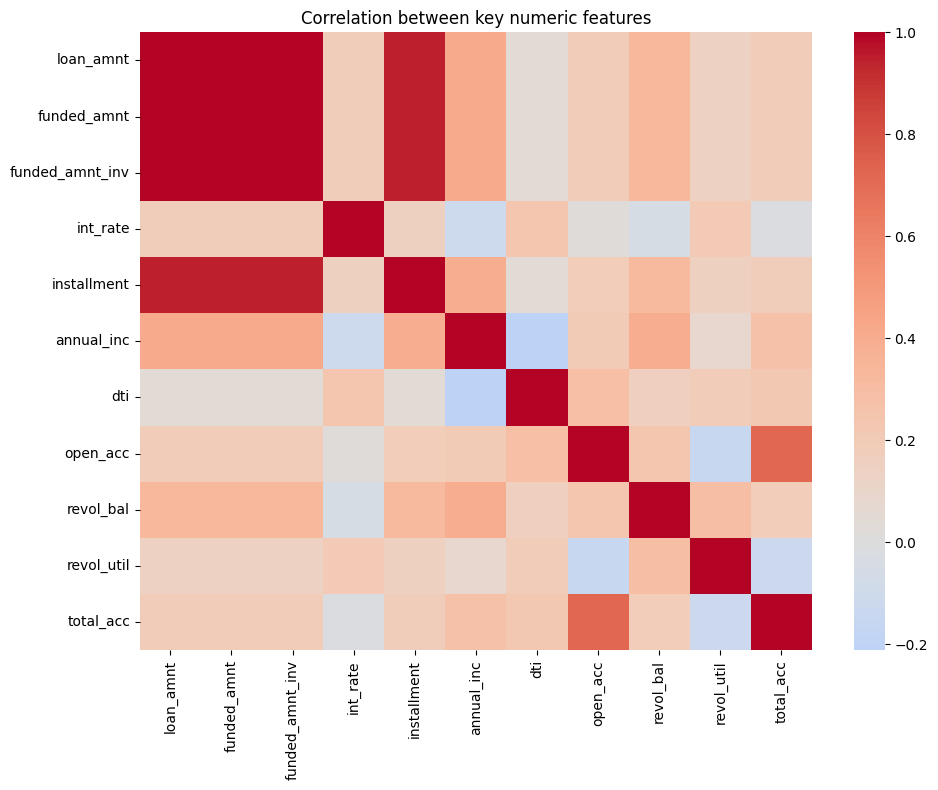

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_corr_cols = [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "int_rate",
    "installment",
    "annual_inc",
    "dti",
    "open_acc",
    "revol_bal",
    "revol_util",
    "total_acc",
]

corr = df_sample[numeric_corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation between key numeric features")
plt.tight_layout()
plt.show()
